## Corrimiento al rojo
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
from random import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
from scipy.fftpack import fft, ifft
plt.style.use('classic')
%matplotlib inline

## Creamos una distribución de puntos aleatoria y su corrimiento

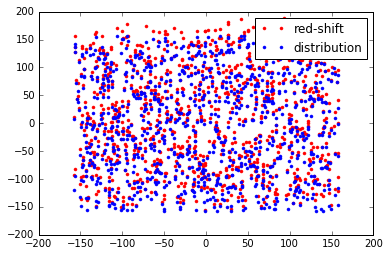

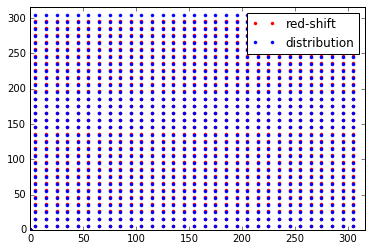

In [2]:
n=1000
rho=0.01
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
x=np.zeros(n)
y=np.zeros(n)
radx=[]
rady=[]
xn = []
yn = []
k=0
for i in range(int(dim/d)):
    for j in range(int(dim/d)):   
        x[k]=(d/2)+d*i
        y[k]=(d/2)+d*j
        k=k+1
c_radx=[]
c_rady=[]
k=0
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
    if(i!=0):
        # Calculo del corrimiento
        for j in range(i-1,i):
            rx = math.sqrt((x[i]-x[j])**2.)
            ry = math.sqrt((y[i]-y[j])**2.)
            rxd = math.sqrt((radx[i]-radx[j])**2.)
            ryd = math.sqrt((rady[i]-rady[j])**2.)
            v = ry*0.1
            vd = ryd*0.1
            ydn = rady[j]+vd
            ynew = y[j]+v
            c_radx.append(radx[j])
            c_rady.append(ydn)
            xn.append(x[j])
            yn.append(ynew)
plt.plot(c_radx,c_rady, 'r.', label='red-shift')
plt.plot(radx,rady, 'b.', label='distribution')
plt.legend()
plt.show()
plt.plot(xn,yn, 'r.', label='red-shift')
plt.plot(x,y, 'b.', label='distribution')
plt.axis([0.0, dim, 0.0, dim]) 
plt.legend()
plt.show()

### Estimador de Landy-Szalay anisotrópico

$\zeta (x,y)=1+\left ( \frac{N_{rd}}{N} \right )^{2}\frac{DD(x,y)}{RR(x,y)}-2\frac{N_{rd}}{N}\frac{DR(x,y)}{RR(x,y)}$

In [3]:
def LSzalay(x,y,xrand,yrand,dim,t_bins):
    global xf, err
    nrd = np.size(xrand)
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdistx = []
    rdisty = []
    drandx = []
    drandy = []
    DRx = []
    DRy = []
    grx = np.zeros(t_bins)
    gry = np.zeros(t_bins)
    grandx = np.zeros(t_bins)
    grandy = np.zeros(t_bins)
    grdx = np.zeros(t_bins)
    grdy = np.zeros(t_bins)
    
    errlsx = np.zeros(t_bins)
    errlsy = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            rx_dr = math.sqrt((x[i]-xrand[j])**2)
            ry_dr = math.sqrt((y[i]-yrand[j])**2)
            rx = math.sqrt((x[i]-x[j])**2)
            ry = math.sqrt((y[i]-y[j])**2)
            rx_rand = math.sqrt((xrand[i]-xrand[j])**2)
            ry_rand = math.sqrt((yrand[i]-yrand[j])**2)
            rdistx.append(rx)
            drandx.append(rx_rand)
            rdisty.append(ry)
            drandy.append(ry_rand)
            DRx.append(rx_dr)
            DRy.append(ry_dr)
    for i in range(t_bins):
        for j in range(n):
            rx = np.uint32((rdistx[j])/ran)
            rx_rand = np.uint32((drandx[j])/ran)
            rx_dr = np.uint32((DRx[j])/ran)
            ry = np.uint32((rdisty[j])/ran)
            ry_rand = np.uint32((drandy[j])/ran)
            ry_dr = np.uint32((DRy[j])/ran)
            if(rx<dmax):
                if(rx<t_bins):
                    grx[int(rx)]=grx[int(rx)]+1
            if(rx_rand<dmax):
                if(rx_rand<t_bins):
                    grandx[int(rx_rand)]=grandx[int(rx_rand)]+1
            if(rx_dr<dmax):
                if(rx_dr<t_bins):
                    grdx[int(rx_dr)]=grdx[int(rx_dr)]+1
            if(ry<dmax):
                if(ry<t_bins):
                    gry[int(ry)]=gry[int(ry)]+1
            if(ry_rand<dmax):
                if(ry_rand<t_bins):
                    grandy[int(ry_rand)]=grandy[int(ry_rand)]+1
            if(ry_dr<dmax):
                if(ry_dr<t_bins):
                    grdy[int(ry_dr)]=grdy[int(ry_dr)]+1
    for i in range(t_bins):
        if(grandx[i]!=0):
            errlsx[i]=(1+(((nrd/n)**2.)*(grx[i]/grandx[i]))-2*(nrd/n)*(grdx[i]/grandx[i]))
        if(grandy[i]!=0):
            errlsy[i]=(1+(((nrd/n)**2.)*(gry[i]/grandy[i]))-2*(nrd/n)*(grdy[i]/grandy[i]))
    xflsx=np.linspace(0,dmax,np.size(errlsx))
    xflsy=np.linspace(0,dmax,np.size(errlsy))
    plt.plot(xflsx,errlsx/np.max(errlsx),'o-', label='Landy-Szalay')
    plt.xlabel("$r_{x}$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r_{x})$",fontsize = 20)   # Establece el título del eje y
    plt.show()
    plt.plot(xflsy,errlsy/np.max(errlsy),'o-', label='Landy-Szalay')
    plt.xlabel("$r_{y}$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r_{y})$",fontsize = 20)   # Establece el título del eje y
    plt.show()

## Función de correlación sin corrimiento

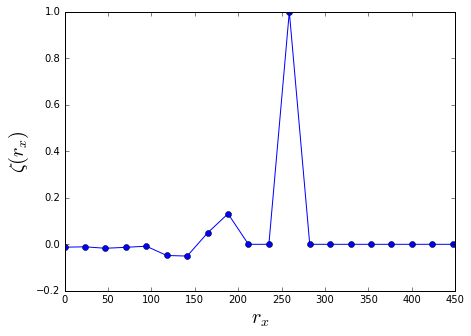

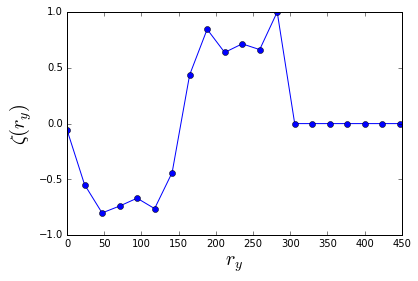

In [4]:
plt.figure(figsize=(7,5))
LSzalay(x,y,radx,rady,dim,20)

## Función de correlación con  un corrimiento

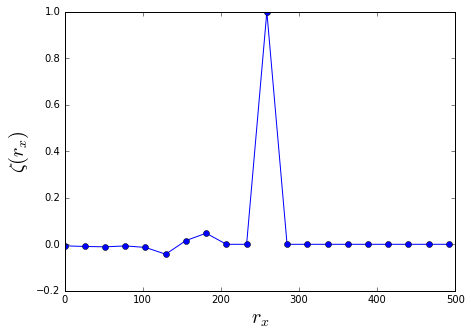

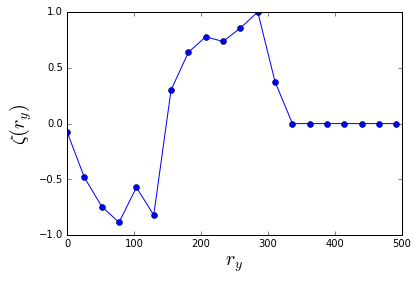

In [5]:
plt.figure(figsize=(7,5))
LSzalay(xn,yn,c_radx,c_rady,dim*(1+0.1),20)